<a href="https://colab.research.google.com/github/TranPhuong3289/CNN_AI_Artificial-Intelligence/blob/main/PH%C3%82N_LO%E1%BA%A0I_10_M%C3%93N_%C4%82N_VN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PHÂN LOẠI 10 MÓN ĂN VN - CNN**

In [ ]:
#Kết nối Drive với ggcolab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#KHAI BÁO TẤT CẢ THƯ VIỆN CẦN DÙNG
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator, image
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from keras.models import  Sequential

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

In [ ]:
#ĐƯỜNG DẪN ĐẾN TẬP TRAIN, VALIDATION,TEST TRONG MYDRIVE
train_data = '/content/drive/MyDrive/tai lieu AI/data_10mon_an_vn/train'
val_data  =  '/content/drive/MyDrive/tai lieu AI/data_10mon_an_vn/validation'
test_data =  '/content/drive/MyDrive/tai lieu AI/data_10mon_an_vn/test'

In [ ]:
from keras.engine.data_adapter import train_validation_split
#CHỈNH LẠI TỈ LỆ VÀ PRE-PREPROCESSING DATA

data_scale = ImageDataGenerator(
              rescale=1. / 255,
              shear_range=0.2,
              zoom_range=0.2,
              horizontal_flip=True)

train_validation_split = data_scale.flow_from_directory(train_data,
                        target_size=(120, 120),
                        batch_size=32,
                        class_mode="categorical")
test = data_scale.flow_from_directory(test_data,
                        target_size=(120, 120),
                        batch_size=32,
                        class_mode="categorical")
val = data_scale.flow_from_directory(val_data,
                        target_size=(120, 120),
                        batch_size=32,
                        class_mode="categorical")

Found 657 images belonging to 10 classes.
Found 92 images belonging to 7 classes.
Found 158 images belonging to 10 classes.


In [ ]:
#ĐẶT NHÃN
class_name = ['bánh bao', 'bánh mì', 'bánh tét', 'bánh xèo', 'bắp nướng', 'bún đậu mắm tôm', 'gà bó xôi', 'gỏi cuốn', 'hủ tiếu','rau muống xào']

#IN NHÃN VÀ ĐẶT GIÁ TRỊ CHO TỪNG PHẦN TỬ
print("labels: ", class_name)
print("match class: ", train_validation_split.class_indices)
print("Tổng cộng các loại thức ăn VN : ",train_validation_split.num_classes)

labels:  ['bánh bao', 'bánh mì', 'bánh tét', 'bánh xèo', 'bắp nướng', 'bún đậu mắm tôm', 'gà bó xôi', 'gỏi cuốn', 'hủ tiếu', 'rau muống xào']
match class:  {'bánh bao': 0, 'bánh mì': 1, 'bánh tét': 2, 'bánh xèo': 3, 'bắp nướng': 4, 'bún đậu mắm tôm': 5, 'gà bó xôi': 6, 'gỏi cuốn': 7, 'hủ tiếu': 8, 'rau muống xào': 9}
Tổng cộng các loại thức ăn VN :  10


In [ ]:
#XÂY DỰNG MODEL CNN
model=Sequential()

#TRÍCH XUẤT TẬP DỮ LIỆU(FEATURE EXTRACTORS)
#LAYER 1
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same', input_shape=(120,120,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
#LAYER 2
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
#LAYER 3
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

#FULLY CONNECTED LAYER
#Flatten Layer is used to change the dimension of output from convolution layer, which has 3D, to 2D output
model.add(Flatten())

#Dense(512) is a fully-connected layer with 512 hidden units
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(10,activation='softmax'))  #10 class_name
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 120, 120, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 60, 60, 32)       0         
 g2D)                                                            
                                                                 
 dropout_30 (Dropout)        (None, 60, 60, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 dropout_31 (Dropout)        (None, 30, 30, 64)       

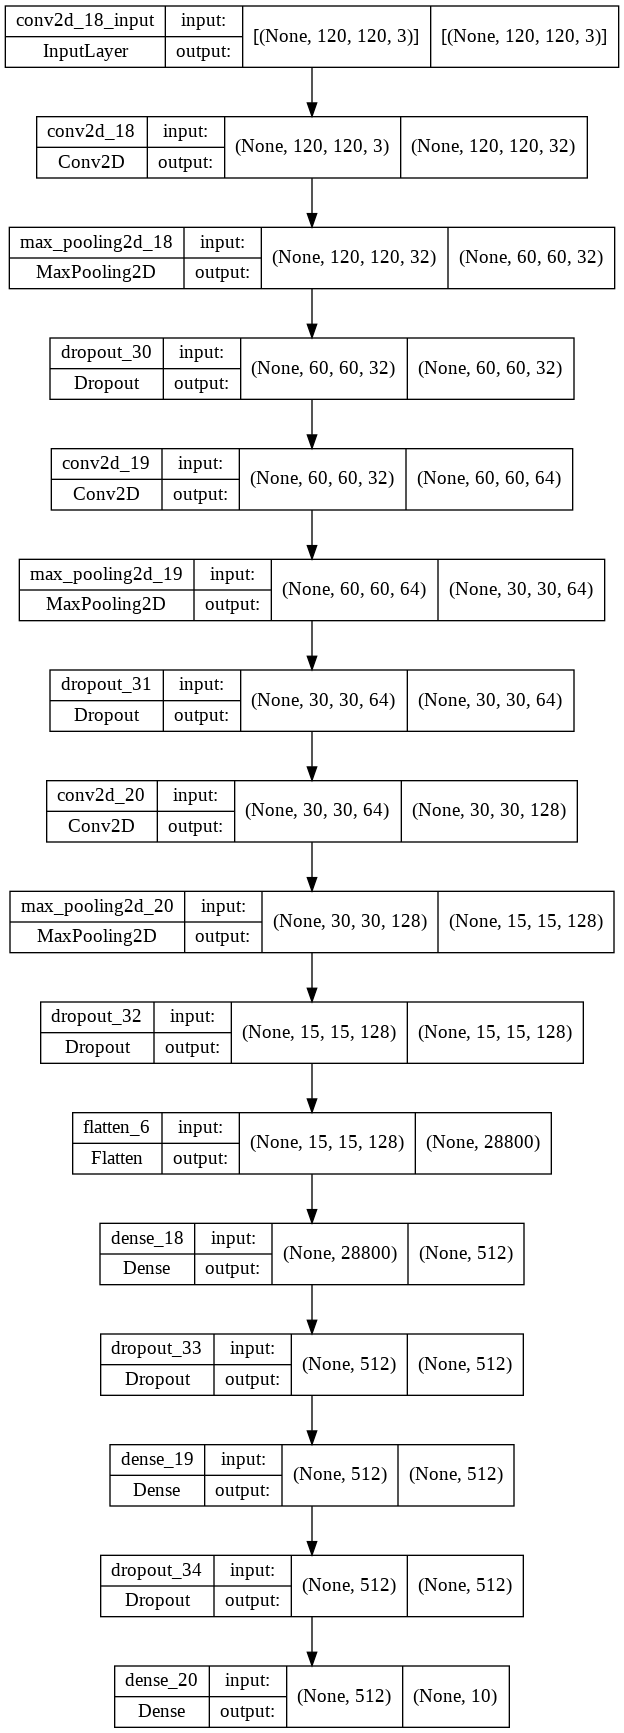

In [ ]:
#hiển thị hàm model.summary() dưới dạng biểu đồ 
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

**COMPILE AND TRANING DATA**

In [ ]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
#Học 150 lần với bước nhảy (verbose = 1) và số lần train ảnh(batch_size = 30)
food_train = model.fit(train_validation_split,batch_size=30,epochs=150,verbose=1,validation_data=val)  

Epoch 1/150
21/21 [==============================] - 99s 5s/step - loss: 9.9502 - accuracy: 0.0974 - val_loss: 2.3024 - val_accuracy: 0.1013
Epoch 2/150
21/21 [==============================] - 28s 1s/step - loss: 2.2421 - accuracy: 0.1385 - val_loss: 2.2443 - val_accuracy: 0.1013
Epoch 3/150
21/21 [==============================] - 28s 1s/step - loss: 2.1272 - accuracy: 0.1811 - val_loss: 1.9960 - val_accuracy: 0.2658
Epoch 4/150
21/21 [==============================] - 28s 1s/step - loss: 1.9034 - accuracy: 0.2801 - val_loss: 1.8529 - val_accuracy: 0.3228
Epoch 5/150
21/21 [==============================] - 28s 1s/step - loss: 1.7817 - accuracy: 0.3166 - val_loss: 1.7529 - val_accuracy: 0.3861
Epoch 6/150
21/21 [==============================] - 28s 1s/step - loss: 1.6907 - accuracy: 0.3775 - val_loss: 1.6307 - val_accuracy: 0.3924
Epoch 7/150
21/21 [==============================] - 28s 1s/step - loss: 1.6928 - accuracy: 0.3744 - val_loss: 1.6146 - val_accuracy: 0.3924
Epoch 8/150
2

In [ ]:
#lưu lại model training
model.save('/content/drive/MyDrive/tai lieu AI/data_10mon_an_vn/Food_classification.h5')

In [ ]:
#In kết quả loss và accuracy của tập training data
test_loss, test_acc = model.evaluate(train_validation_split)
print("\nTest Accuracy: ",test_acc)

21/21 [==============================] - 11s 526ms/step - loss: 0.0156 - accuracy: 0.9970

Test Accuracy:  0.9969558715820312


**After training:**
*   Training accuracy: 98.63%
*   Validation accuracy: 63.92%

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 120, 120, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 60, 60, 32)       0         
 g2D)                                                            
                                                                 
 dropout_30 (Dropout)        (None, 60, 60, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 dropout_31 (Dropout)        (None, 30, 30, 64)       

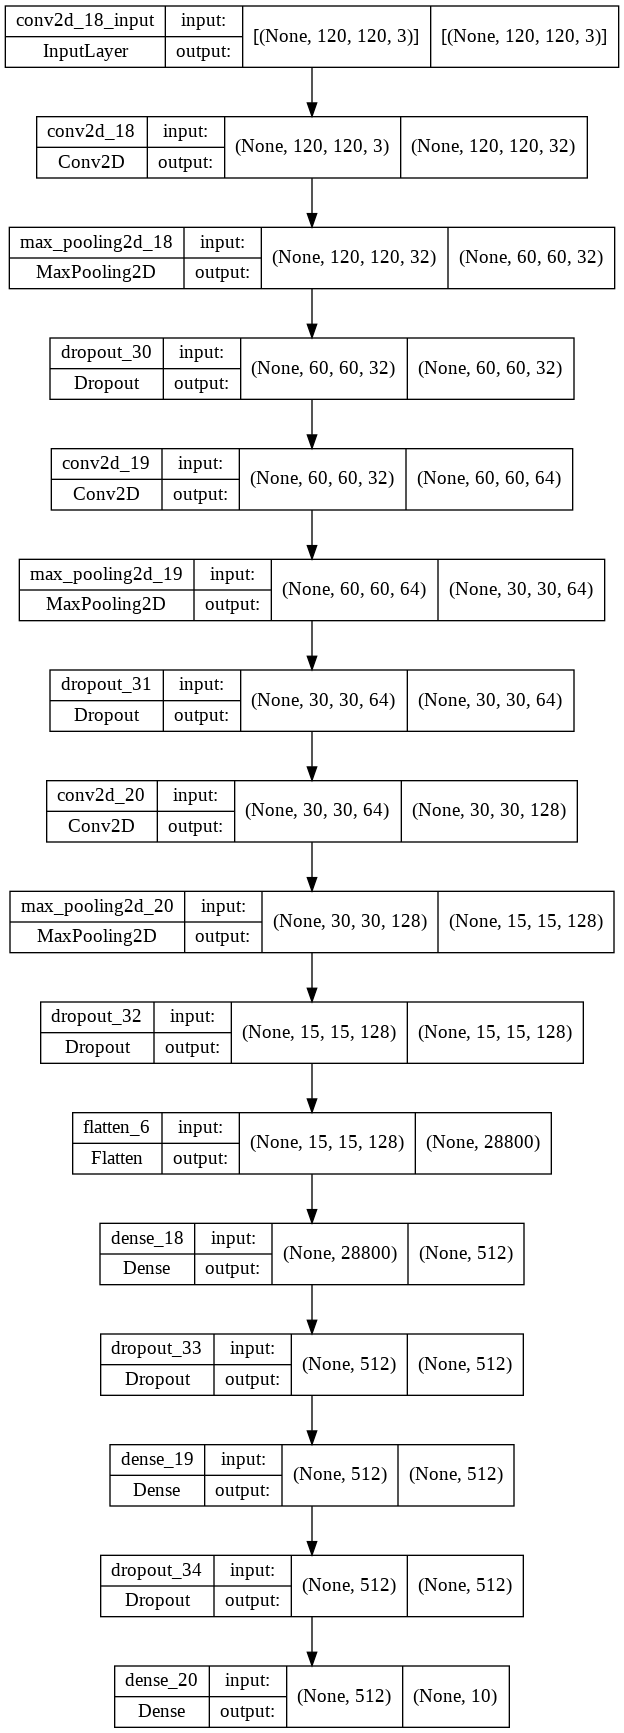

In [ ]:
#Loading the model
model_1 = tf.keras.models.load_model('/content/drive/MyDrive/tai lieu AI/data_10mon_an_vn/Food_classification.h5')
model_1.summary()
plot_model(model_1, show_shapes = True) #chạy hiển thị model_1.summary()

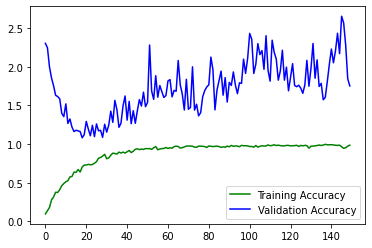

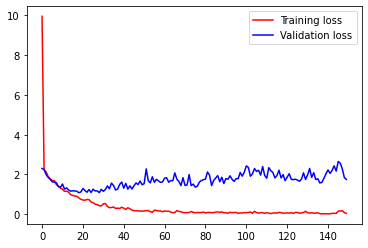

In [ ]:
#Graphing loss function and accuracy scores of the model

acc = food_train.history['accuracy'] #traning accuracy scores from the model has trained
val_acc = food_train.history['val_accuracy'] # validatioin accuracy scores from has trained
loss = food_train.history['loss']#training loss scores from the model that has trained
val_loss = val_acc = food_train.history['val_loss'] 


plt.plot(acc,'green', label = 'Training Accuracy')
plt.plot(val_acc,'blue', label = 'Validation Accuracy')
plt.legend() #hiển thị chú thích
plt.figure()  # tách 2 data riêng biệt accuracy và loss 

plt.plot(loss,'red',label = 'Training loss')
plt.plot(val_loss, 'blue',label = 'Validation loss')
plt.legend()

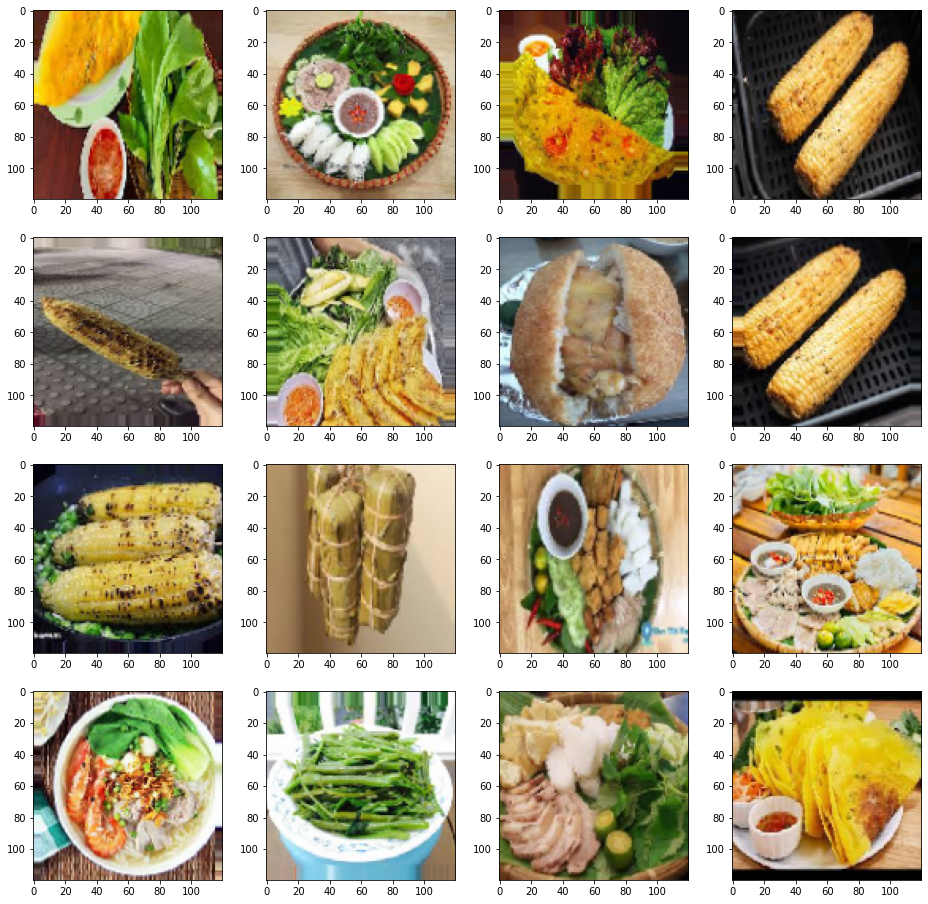

In [ ]:
#Hiện thị ảnh các món ăn random với 4 hàng 4 cột
X_TEST, Y_TEST = next(test)
fig = plt.figure(figsize=(16,16))  
#Hiện thị 16 ảnh 4 hàng 4 cột
colums = 4
rows = 4

for i in range(rows*colums):
    fig.add_subplot(rows, colums, i+1)
    plt.imshow(X_TEST[i])

# **DỰ ĐOÁN:**

Dự đoán: Bánh Tét


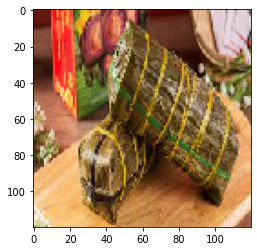

In [ ]:
#Dự đoán món ăn tại tập test QUA MODEL ĐÃ TRAIN:
pic = image.load_img('/content/drive/MyDrive/tai lieu AI/data_10mon_an_vn/test/bánh tét/images (2).jpg', target_size=(120,120)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,120,120,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)


# predict 
guess=np.argmax(model.predict(pic), axis=1)
#đặt điều kiện
if guess[0]==0:
  print("Dự đoán: Bánh Bao")
if guess[0]==1:
  print("Dự đoán: Bánh Mì")
if guess[0]==2:
  print("Dự đoán: Bánh Tét")
if guess[0]==3:
  print("Dự đoán: Bánh Xèo")
if guess[0]==4:
  print("Dự đoán: Bắp Nướng")
if guess[0]==5:
  print("Dự đoán: Bún Đậu Mắm Tôm")
if guess[0]==6:
  print("Dự đoán: Gà Bó Xôi")
if guess[0]==7:
  print("Dự đoán: Gỏi Cuốn")
if guess[0]==8:
  print("Dự đoán: Hủ Tiếu")
if guess[0]==9:
  print("Dự đoán: Rau Muống Xào")


Dự đoán: Hủ Tiếu


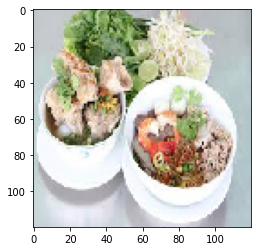

In [ ]:
pic = image.load_img('/content/drive/MyDrive/tai lieu AI/data_10mon_an_vn/test/hủ tiếu/images (6).jpg', target_size=(120,120)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,120,120,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)


# predict 
guess=np.argmax(model.predict(pic), axis=1)
#đặt điều kiện
if guess[0]==0:
  print("Dự đoán: Bánh Bao")
if guess[0]==1:
  print("Dự đoán: Bánh Mì")
if guess[0]==2:
  print("Dự đoán: Bánh Tét")
if guess[0]==3:
  print("Dự đoán: Bánh Xèo")
if guess[0]==4:
  print("Dự đoán: Bắp Nướng")
if guess[0]==5:
  print("Dự đoán: Bún Đậu Mắm Tôm")
if guess[0]==6:
  print("Dự đoán: Gà Bó Xôi")
if guess[0]==7:
  print("Dự đoán: Gỏi Cuốn")
if guess[0]==8:
  print("Dự đoán: Hủ Tiếu")
if guess[0]==9:
  print("Dự đoán: Rau Muống Xào")


Dự đoán: Rau Muống Xào


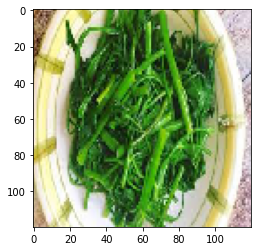

In [ ]:
pic = image.load_img('/content/drive/MyDrive/tai lieu AI/data_10mon_an_vn/test/rau muống xào/images (3).jpg', target_size=(120,120)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,120,120,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)


# predict 
guess=np.argmax(model.predict(pic), axis=1)
#đặt điều kiện
if guess[0]==0:
  print("Dự đoán: Bánh Bao")
if guess[0]==1:
  print("Dự đoán: Bánh Mì")
if guess[0]==2:
  print("Dự đoán: Bánh Tét")
if guess[0]==3:
  print("Dự đoán: Bánh Xèo")
if guess[0]==4:
  print("Dự đoán: Bắp Nướng")
if guess[0]==5:
  print("Dự đoán: Bún Đậu Mắm Tôm")
if guess[0]==6:
  print("Dự đoán: Gà Bó Xôi")
if guess[0]==7:
  print("Dự đoán: Gỏi Cuốn")
if guess[0]==8:
  print("Dự đoán: Hủ Tiếu")
if guess[0]==9:
  print("Dự đoán: Rau Muống Xào")



Dự đoán: Bắp Nướng


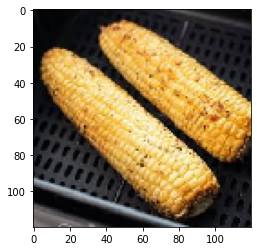

In [ ]:
pic = image.load_img('/content/drive/MyDrive/tai lieu AI/data_10mon_an_vn/test/bắp nướng/images.jpg', target_size=(120,120)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,120,120,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)


# predict 
guess=np.argmax(model.predict(pic), axis=1)
#đặt điều kiện
if guess[0]==0:
  print("Dự đoán: Bánh Bao")
if guess[0]==1:
  print("Dự đoán: Bánh Mì")
if guess[0]==2:
  print("Dự đoán: Bánh Tét")
if guess[0]==3:
  print("Dự đoán: Bánh Xèo")
if guess[0]==4:
  print("Dự đoán: Bắp Nướng")
if guess[0]==5:
  print("Dự đoán: Bún Đậu Mắm Tôm")
if guess[0]==6:
  print("Dự đoán: Gà Bó Xôi")
if guess[0]==7:
  print("Dự đoán: Gỏi Cuốn")
if guess[0]==8:
  print("Dự đoán: Hủ Tiếu")
if guess[0]==9:
  print("Dự đoán: Rau Muống Xào")

Dự đoán: Gà Bó Xôi


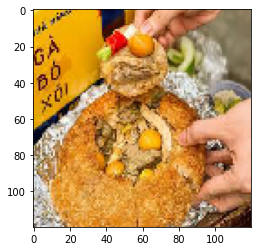

In [ ]:
pic = image.load_img('/content/drive/MyDrive/tai lieu AI/data_10mon_an_vn/test/gà bó xôi/images (7).jpg', target_size=(120,120)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,120,120,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)


# predict 
guess=np.argmax(model.predict(pic), axis=1)
#đặt điều kiện
if guess[0]==0:
  print("Dự đoán: Bánh Bao")
if guess[0]==1:
  print("Dự đoán: Bánh Mì")
if guess[0]==2:
  print("Dự đoán: Bánh Tét")
if guess[0]==3:
  print("Dự đoán: Bánh Xèo")
if guess[0]==4:
  print("Dự đoán: Bắp Nướng")
if guess[0]==5:
  print("Dự đoán: Bún Đậu Mắm Tôm")
if guess[0]==6:
  print("Dự đoán: Gà Bó Xôi")
if guess[0]==7:
  print("Dự đoán: Gỏi Cuốn")
if guess[0]==8:
  print("Dự đoán: Hủ Tiếu")
if guess[0]==9:
  print("Dự đoán: Rau Muống Xào")